# TIME SERIES FORECASTING MODEL (Super_Store Sales)

<img src="store.jpg">

A time series model is a set of data points ordered in time, where time is the independent variable. These models are used to analyze and forecast the future.Time series analysis helps organizations understand the underlying causes of trends or systemic patterns over time.


However, there are other aspects that come into play when dealing with time series.

Is it stationary?

Is there a seasonality?

Is there a trend?

### Trend analysis means determining consistent movement in a certain direction. 

### Seasonal variation describes events that occur at specific and regular intervals during the course of a year. 

### Dataset - 
Contains the details of the sales of Super_Store category wise. 
## Task - Analyze the sales value of a sub-category and predict the future sales

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
dataset = pd.read_csv('Super_Store.csv', encoding ='unicode_escape')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

### The data type of Date column i.e. Order Date should be date time

In [4]:
# Converting the datatype
dataset['Order Date']= pd.to_datetime(dataset['Order Date'])

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   object        
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [6]:
print(dataset['Order Date'].min())
print(dataset['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [7]:
# Arranging the data into a sequential order
dataset.sort_values(by = 'Order Date', inplace =True)

In [8]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1577,7475,CA-2014-167199,2014-01-06,1/10/2014,Standard Class,ME-17320,Maria Etezadi,Home Office,United States,Henderson,...,42420,South,FUR-CH-10004063,Furniture,Chairs,Global Deluxe High-Back Manager's Chair,2573.820,9,0.0,746.4078
1626,7661,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
631,2979,CA-2014-109232,2014-01-13,1/16/2014,Second Class,ND-18370,Natalie DeCherney,Consumer,United States,Mount Pleasant,...,29464,South,FUR-CH-10000422,Furniture,Chairs,Global Highback Leather Tilter in Burgundy,545.940,6,0.0,87.3504


In [9]:
dataset.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1619,7637,US-2017-158526,2017-12-29,1/1/2018,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10001270,Furniture,Chairs,Harbour Creations Steel Folding Chair,258.750,3,0.0,77.6250
1617,7633,US-2017-158526,2017-12-29,1/1/2018,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10002602,Furniture,Chairs,DMI Arturo Collection Mission-style Design Woo...,1207.840,8,0.0,314.0384
1057,5132,CA-2017-146626,2017-12-29,1/5/2018,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,...,92804,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,8,0.0,37.4144
1618,7636,US-2017-158526,2017-12-29,1/1/2018,Second Class,KH-16360,Katherine Hughes,Consumer,United States,Louisville,...,40214,South,FUR-CH-10004495,Furniture,Chairs,"Global Leather and Oak Executive Chair, Black",300.980,1,0.0,87.2842
186,907,CA-2017-143259,2017-12-30,1/3/2018,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,10009,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,4,0.2,12.1176


In [10]:
dataset['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

In [11]:
# Taking into account the values of 'Furnishings' Sub-Category
dataset1 = dataset.loc[dataset['Sub-Category']=='Furnishings']

In [12]:
dataset1.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
1626,7661,CA-2014-105417,2014-01-07,1/12/2014,Standard Class,VS-21820,Vivek Sundaresam,Consumer,United States,Huntsville,...,77340,Central,FUR-FU-10004864,Furniture,Furnishings,"Howard Miller 14-1/2"" Diameter Chrome Round Wa...",76.728,3,0.6,-53.7096
181,867,CA-2014-149020,2014-01-10,1/15/2014,Standard Class,AJ-10780,Anthony Jacobs,Corporate,United States,Springfield,...,22153,South,FUR-FU-10000965,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Ridgewood Wall ...",51.940,1,0.0,21.2954
150,717,CA-2014-130092,2014-01-11,1/14/2014,First Class,SV-20365,Seth Vernon,Consumer,United States,Dover,...,19901,East,FUR-FU-10000010,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,2,0.0,3.0814
200,971,CA-2014-115791,2014-01-16,1/18/2014,Second Class,DL-13315,Delfina Latchford,Consumer,United States,Philadelphia,...,19134,East,FUR-FU-10001095,Furniture,Furnishings,DAX Black Cherry Wood-Tone Poster Frame,127.104,6,0.2,28.5984
1326,6328,CA-2014-167927,2014-01-20,1/26/2014,Standard Class,XP-21865,Xylona Preis,Consumer,United States,Westland,...,48185,Central,FUR-FU-10002918,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,272.940,3,0.0,30.0234


In [13]:
dataset1.shape

(957, 21)

In [14]:
dataset1 = dataset1[['Order Date','Sales']]
dataset1

,Order Date,Sales
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
200,2014-01-16,127.104
1326,2014-01-20,272.940
...,...,...
1436,2017-12-28,7.968
1438,2017-12-28,2.960
504,2017-12-28,7.400
1128,2017-12-29,68.460


In [15]:
dataset1 = dataset1.groupby('Order Date')['Sales'].sum().reset_index()

In [16]:
dataset1.set_index('Order Date', inplace = True)
dataset1.head()

,Sales
Order Date,
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-16,127.104
2014-01-20,345.570


In [17]:
# dates are not given in a continuous manner- Grouping the data monthwise
y = dataset1['Sales'].resample('MS').mean()

In [18]:
y['2014']

Order Date
2014-01-01    101.681429
2014-02-01     98.245000
2014-03-01     68.589714
2014-04-01     98.404600
2014-05-01    111.452286
2014-06-01     54.093750
2014-07-01    112.827750
2014-08-01     99.775800
2014-09-01    148.047800
2014-10-01     69.090222
2014-11-01    137.986778
2014-12-01    148.391714
Freq: MS, Name: Sales, dtype: float64

In [19]:
y['2015']

Order Date
2015-01-01    254.022800
2015-02-01    103.052000
2015-03-01    143.595800
2015-04-01    299.318800
2015-05-01    127.682833
2015-06-01    178.351857
2015-07-01    132.555636
2015-08-01     72.750182
2015-09-01    137.476500
2015-10-01     77.095000
2015-11-01    186.835684
2015-12-01    140.589000
Freq: MS, Name: Sales, dtype: float64

<AxesSubplot:xlabel='Order Date'>

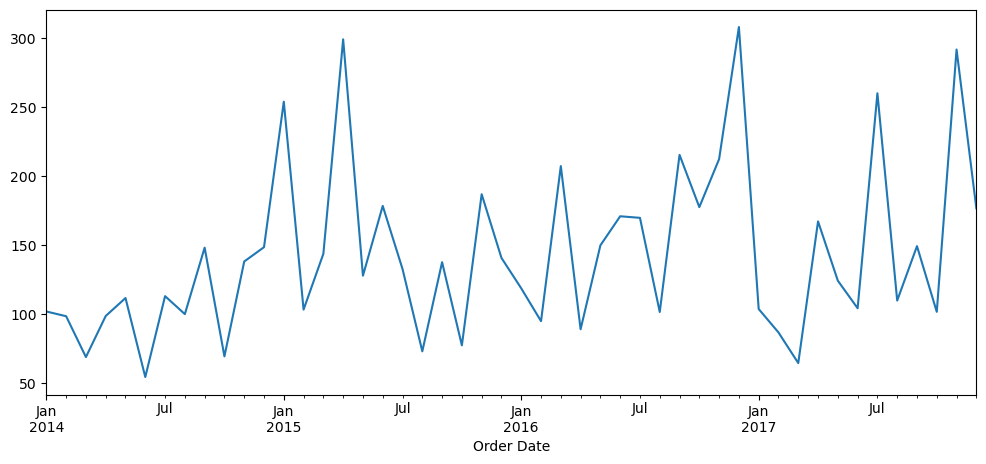

In [20]:
y.plot(figsize =(12,5))

# Durbin Watson Test
## To check whether the dataset belongs to Time Series problem or Linear Regression

In [21]:
import statsmodels.api as sm
sm.stats.durbin_watson(y)

0.3088162986591814

### Value less than 2 - It means data belongs to Time Series Forecasting

# Decomposition

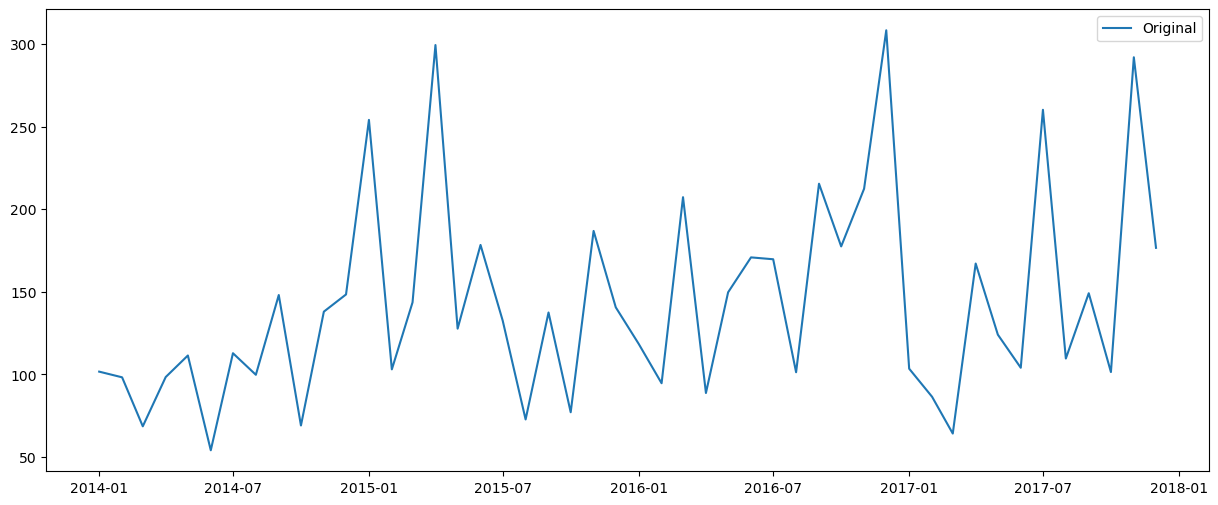

<Figure size 1500x600 with 0 Axes>

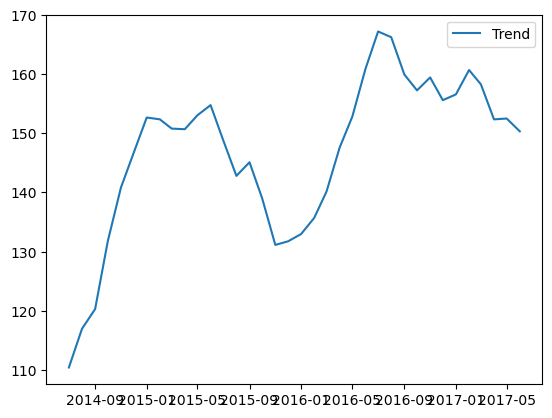

<Figure size 1500x600 with 0 Axes>

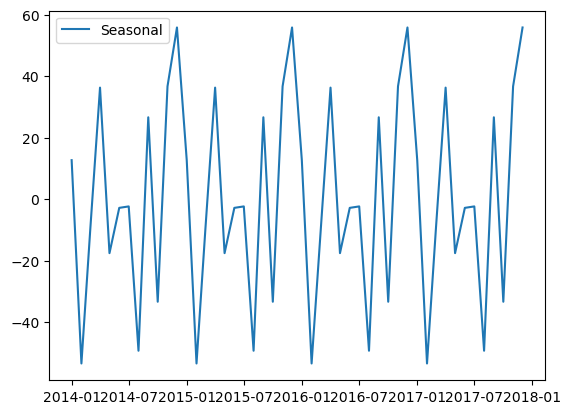

<Figure size 1500x600 with 0 Axes>

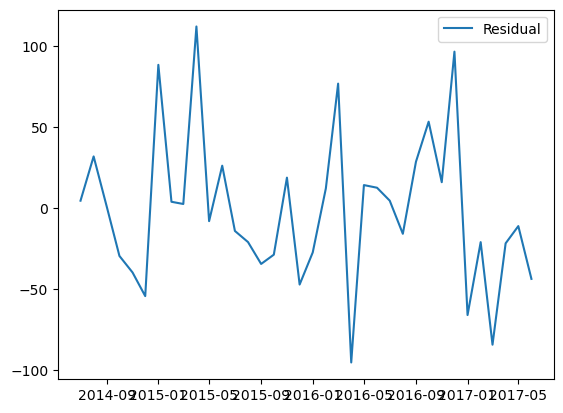

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)

plt.figure(figsize=(15,6))
plt.plot(y, label='Original')
plt.legend(loc ='best')

plt.figure(figsize=(15,6))
trend = decomposition.trend
plt.show()
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.figure(figsize=(15,6))
seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.figure(figsize=(15,6))
residual = decomposition.resid
plt.show()
plt.plot(residual, label='Residual')
plt.legend(loc='best')


### Here, it can be observed that the dataset has trend as well as seasonality

# Check Data Stationary or not

WHAT IS THE DICKEY-FULLER TEST?

The Dickey-Fuller test is a statistical test used to evaluate whether a time series is stationary or not. It evaluates the null hypothesis to determine if a unit root is present. If the equation returns p>0.05, then the process is not stationary. If p<=0.05, then the process is considered stationary.

In [23]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print("ADF Statistic : %f" % result[0])
print("p-value : %f" % result[1])
print('Critical Values: ')
for key, value in result[4].items():
    print('\t%s : %.3f ' % (key, value))

ADF Statistic : -6.582724
p-value : 0.000000
Critical Values: 
	1% : -3.578 
	5% : -2.925 
	10% : -2.601 


### Strong evidence against null hypothesis and timeseries is Stationary

# Time Series Forecasting using SARIMA model (Trend & Seasonality)

In [24]:
# p, d, q
import itertools

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print("Examples of parameter combinations for seasonal ARIMA Model.....")
print('SARIMA : {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMA : {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMA : {} x {}'.format(pdq[2], seasonal_pdq[1]))
print('SARIMA : {} x {}'.format(pdq[2], seasonal_pdq[2]))

Examples of parameter combinations for seasonal ARIMA Model.....
SARIMA : (0, 0, 1) x (0, 0, 1, 12)
SARIMA : (0, 0, 1) x (0, 1, 0, 12)
SARIMA : (0, 1, 0) x (0, 0, 1, 12)
SARIMA : (0, 1, 0) x (0, 1, 0, 12)


In [25]:
# Best Parameter Selection - Grid Search
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param, seasonal_order=param_seasonal,
                                           enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:610.4523391155499
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1516.248434758049
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:412.47012489596443
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:265.0805373060343
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:427.850528951821


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1279.473991435249
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:277.90619262177574
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:268.51925989458965
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:575.5457157154003


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2646.9089985766304
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:403.7096236573157
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:256.7283945912014
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:429.8378434700547


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2563.0695204413173
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:279.89143030161256
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:260.0304114902592
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:544.8544820388091
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1398.6418017503904
SARIMAX(0, 1, 0)x(0, 1, 0, 12)12 - AIC:424.94652213291715
SARIMAX(0, 1, 0)x(0, 1, 1, 12)12 - AIC:270.52466970828107
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:423.1864486598583
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1366.0275894196282
SARIMAX(0, 1, 0)x(1, 1, 0, 12)12 - AIC:282.96749447440016
SARIMAX(0, 1, 0)x(1, 1, 1, 12)12 - AIC:271.47588099494493
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:507.71451490547554


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2210.3972075758693
SARIMAX(0, 1, 1)x(0, 1, 0, 12)12 - AIC:395.1578650441703
SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:245.50748283174616
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:399.7525970635467


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1698.1049566840566
SARIMAX(0, 1, 1)x(1, 1, 0, 12)12 - AIC:271.65280627721035
SARIMAX(0, 1, 1)x(1, 1, 1, 12)12 - AIC:249.36921264015
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:554.2157561479628


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1741.220224968443
SARIMAX(1, 0, 0)x(0, 1, 0, 12)12 - AIC:414.45490975584534
SARIMAX(1, 0, 0)x(0, 1, 1, 12)12 - AIC:267.0368061376952
SARIMAX(1, 0, 0)x(1, 0, 0, 12)12 - AIC:415.56371313105706


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1672.0230830316752
SARIMAX(1, 0, 0)x(1, 1, 0, 12)12 - AIC:268.85514515917004
SARIMAX(1, 0, 0)x(1, 1, 1, 12)12 - AIC:270.50039503052875
SARIMAX(1, 0, 1)x(0, 0, 0, 12)12 - AIC:518.2151984657639


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1585.61280158083
SARIMAX(1, 0, 1)x(0, 1, 0, 12)12 - AIC:401.45479016592634
SARIMAX(1, 0, 1)x(0, 1, 1, 12)12 - AIC:257.1283902596207
SARIMAX(1, 0, 1)x(1, 0, 0, 12)12 - AIC:403.664340289208


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2446.8136322397236
SARIMAX(1, 0, 1)x(1, 1, 0, 12)12 - AIC:270.08534391869546
SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 - AIC:261.73796585275676
SARIMAX(1, 1, 0)x(0, 0, 0, 12)12 - AIC:528.736580777553


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1164.0929183636438
SARIMAX(1, 1, 0)x(0, 1, 0, 12)12 - AIC:413.55056570894357
SARIMAX(1, 1, 0)x(0, 1, 1, 12)12 - AIC:263.82251472617276
SARIMAX(1, 1, 0)x(1, 0, 0, 12)12 - AIC:399.01458981595397


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1346.3642462797043
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 - AIC:264.317369649141
SARIMAX(1, 1, 0)x(1, 1, 1, 12)12 - AIC:264.30023555648086
SARIMAX(1, 1, 1)x(0, 0, 0, 12)12 - AIC:509.5565659721903


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(0, 0, 1, 12)12 - AIC:591.7947913872108
SARIMAX(1, 1, 1)x(0, 1, 0, 12)12 - AIC:395.93582521648267
SARIMAX(1, 1, 1)x(0, 1, 1, 12)12 - AIC:247.2727902996675
SARIMAX(1, 1, 1)x(1, 0, 0, 12)12 - AIC:389.9072578339469


C:\Users\archa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2144.161888118561
SARIMAX(1, 1, 1)x(1, 1, 0, 12)12 - AIC:262.48884991432004
SARIMAX(1, 1, 1)x(1, 1, 1, 12)12 - AIC:251.11291177388327


In [26]:
# SARIMAX(0, 1, 1)x(0, 1, 1, 12)12 - AIC:245.50748283174616 (lowest AIC value)

In [27]:
# Fitting the SARIMAX model
model = sm.tsa.statespace.SARIMAX(y, order=(0,1,1), seasonal_order=(0,1,1,12),
                                           enforce_stationarity=False,enforce_invertibility=False)

result = model.fit()
print(result.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -119.754
Date:                            Fri, 06 Oct 2023   AIC                            245.507
Time:                                    21:21:57   BIC                            248.641
Sample:                                01-01-2014   HQIC                           246.188
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000   2148.304     -0.000      1.000   -4211.598    4209.598
ma.S.L12      -1.0000   2148.317   

# Checking Forecast

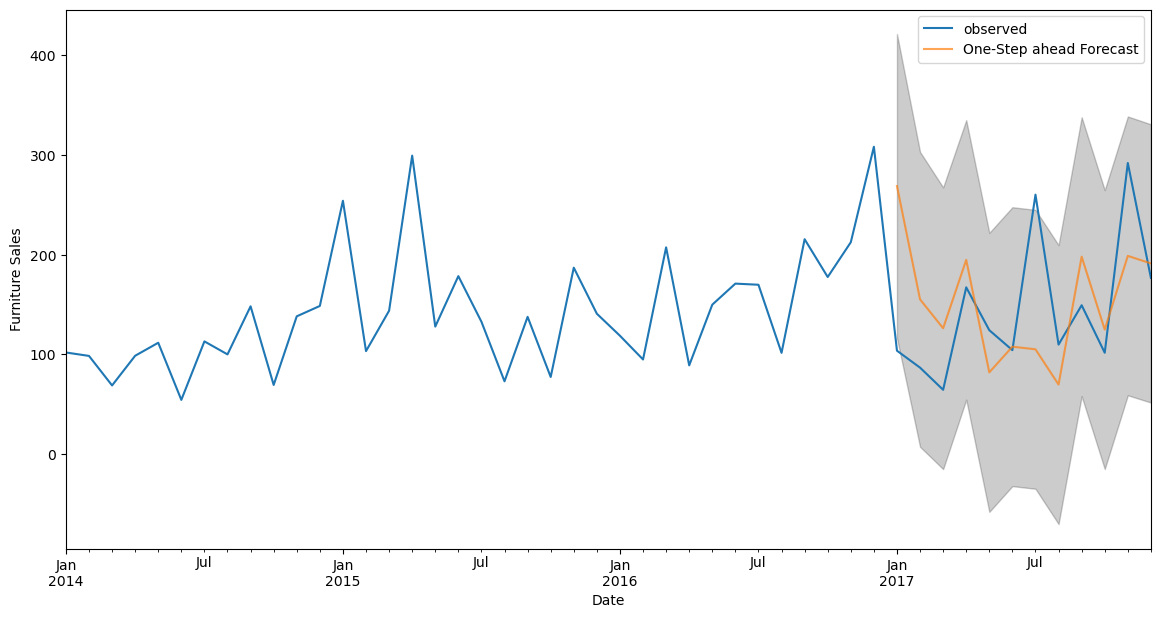

In [28]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-Step ahead Forecast', alpha=0.7, figsize=(14,7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# Calculating RMSE to check overall error

In [29]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth)**2).mean()
mape = (((y_forecasted - y_truth)/(y_truth)).mean())*100
print("The Root Mean Squared Error of our Forecasts is {}".format(round(np.sqrt(mse),2)))
print("MAPE is {}".format(round(mape),2))

The Root Mean Squared Error of our Forecasts is 79.56
MAPE is 21


# Forecasting the Sales Value for the next 2 years

            lower Sales  upper Sales
2018-01-01    72.408082   347.093120
2018-02-01   -19.290976   257.541300
2018-03-01    33.875360   337.620596
2018-04-01    46.615420   364.329845
2018-05-01    -5.224895   329.694047
2018-06-01     7.296535   357.175614
2018-07-01    -6.631425   358.115482
2018-08-01   -73.872486   304.960842
2018-09-01     0.233097   392.740042
2018-10-01   -57.899305   347.729853
2018-11-01    12.978511   431.495409
2018-12-01    18.236288   448.721221
2019-01-01   -54.748602   391.033632
2019-02-01  -117.937791   338.431086
2019-03-01   -86.029716   379.655492
2019-04-01   -45.483006   429.930820
2019-05-01   -93.999815   390.777384
2019-06-01   -89.927357   404.118949
2019-07-01   -54.158136   448.959807
2019-08-01  -144.824519   367.207007
2019-09-01   -80.239218   440.577256
2019-10-01  -134.968247   394.404539
2019-11-01   -29.337718   508.695906
2019-12-01   -58.508715   487.346453
2020-01-01  -112.649606   467.626682
2020-02-01  -184.067454   404.373981
2

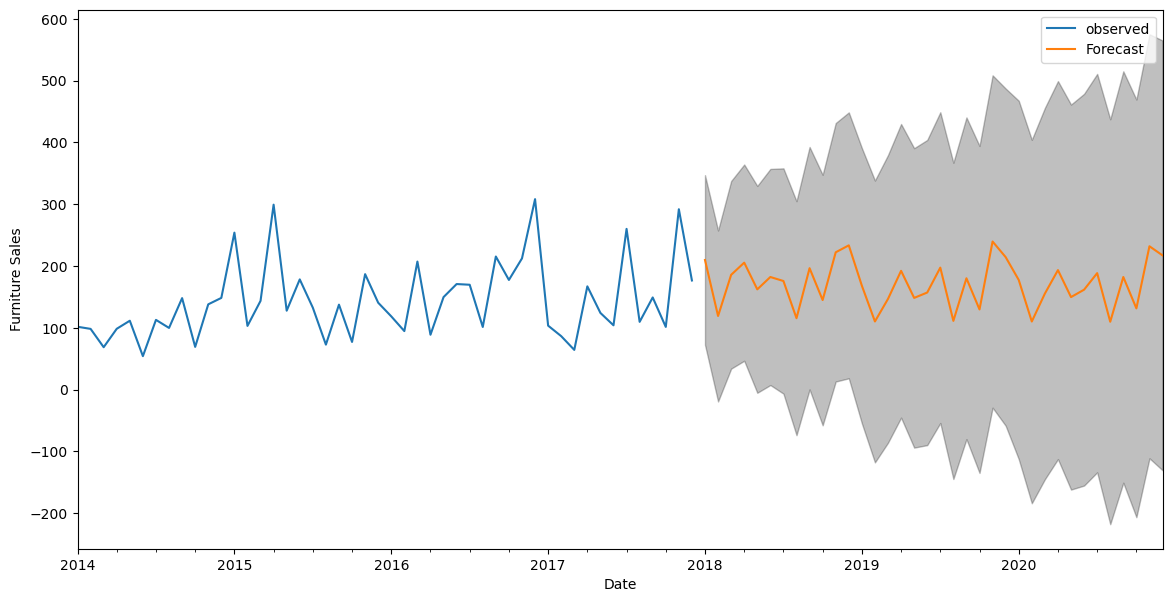

In [30]:
pred_uc = results.get_forecast(steps=36)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=[14,7])
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, 
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()